In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Load data into a DataFrame
data = pd.read_csv('/content/drive/MyDrive/Project/modified_data2.csv')

Normalizating data

In [ ]:
# Normalize numerical columns
numerical_columns = ['Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp',
                     'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
                     'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
                     'DaySinceLastOrder', 'CashbackAmount']
scaler = MinMaxScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])


In [ ]:
# Encode categorical variables
data = pd.get_dummies(data, columns=['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus'])

# Split data into features (X) and target variable (y)
X = data.drop('Churn', axis=1)  # Features
y = data['Churn']  # Target variable

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=30)

In [ ]:
seed = 9832

In [ ]:
def plotConfusionMatrix(y_test, y_pred):
  cm = confusion_matrix(y_test, y_pred)

  # Plot confusion matrix
  plt.figure(figsize=(8, 6))
  sns.set(font_scale=1.4)  # for label size
  sns.heatmap(cm, annot=True, annot_kws={"size": 1}, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
  plt.xlabel('Predicted labels')
  plt.ylabel('True labels')
  plt.title('Confusion Matrix')
  plt.show()



In [ ]:
def calAccuracy(y_test, y_pred):
  # Calculate accuracy
  accuracy = accuracy_score(y_test, y_pred)
  print("Accuracy:", accuracy)

  # Print classification report
  print(classification_report(y_test, y_pred))

Logistic Regression

Accuracy: 0.8757102272727273
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1145
           1       0.77      0.48      0.59       263

    accuracy                           0.88      1408
   macro avg       0.83      0.72      0.76      1408
weighted avg       0.87      0.88      0.86      1408



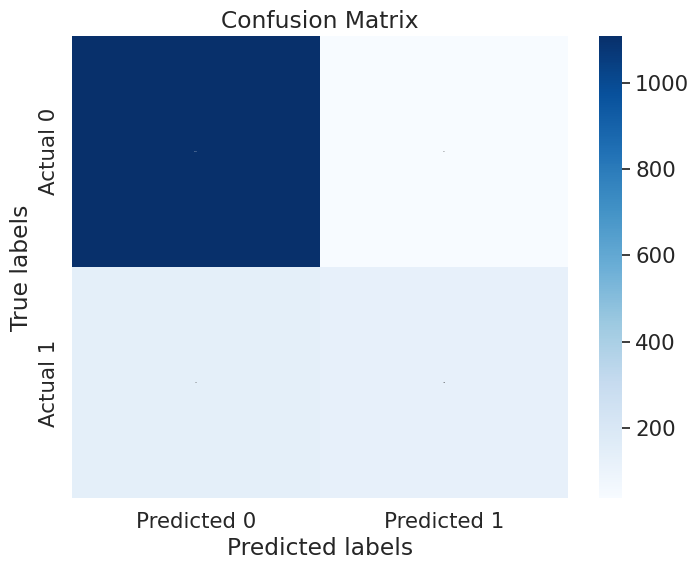

In [ ]:
# Create and train logistic regression model
model = LogisticRegression(random_state =seed, max_iter = 1000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

calAccuracy(y_test, y_pred)

plotConfusionMatrix(y_test, y_pred)

Confusion matrix for Logistic Regression

True Negative (Specificity/Recall): The automatic model has a slightly better true negative rate (99.35% vs. 98.82%), which suggests an improvement in correctly identifying customers who are not at risk of churning.
False Negative: The automatic model has a lower false negative rate (8.04% vs. 12.32%), meaning it has fewer instances where it incorrectly predicts a churning customer as not churning. This is a significant improvement, as it means the company is less likely to miss opportunities for intervention with customers at risk.
True Positive (Sensitivity): The automatic model also has a better true positive rate (91.96% vs. 87.69%), indicating it is more effective at correctly identifying customers who will churn. This improvement is crucial because it allows the company to focus retention efforts on the right customers.
False Positive: The automatic model has a slightly lower false positive rate (0.65% vs. 1.18%), which means it's making fewer errors in incorrectly predicting churn for loyal customers. This will help reduce unnecessary costs associated with targeting customers who do not need intervention.

NAIVE BAYES


In [ ]:
from sklearn.naive_bayes import GaussianNB

Accuracy: 0.7563920454545454
              precision    recall  f1-score   support

           0       0.93      0.76      0.84      1145
           1       0.41      0.74      0.53       263

    accuracy                           0.76      1408
   macro avg       0.67      0.75      0.68      1408
weighted avg       0.83      0.76      0.78      1408



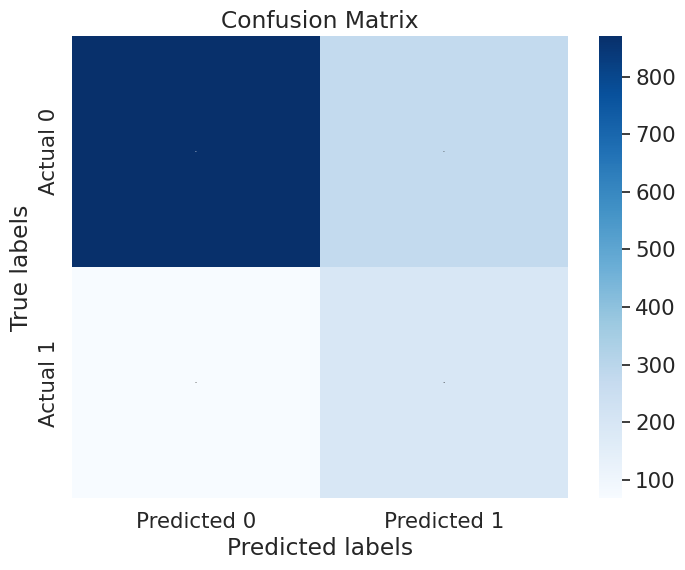

In [ ]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

calAccuracy(y_test, y_pred)

plotConfusionMatrix(y_test, y_pred)

XGB Classifier

In [ ]:
from xgboost import XGBClassifier

Accuracy: 0.9651988636363636
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1145
           1       0.91      0.90      0.91       263

    accuracy                           0.97      1408
   macro avg       0.94      0.94      0.94      1408
weighted avg       0.97      0.97      0.97      1408



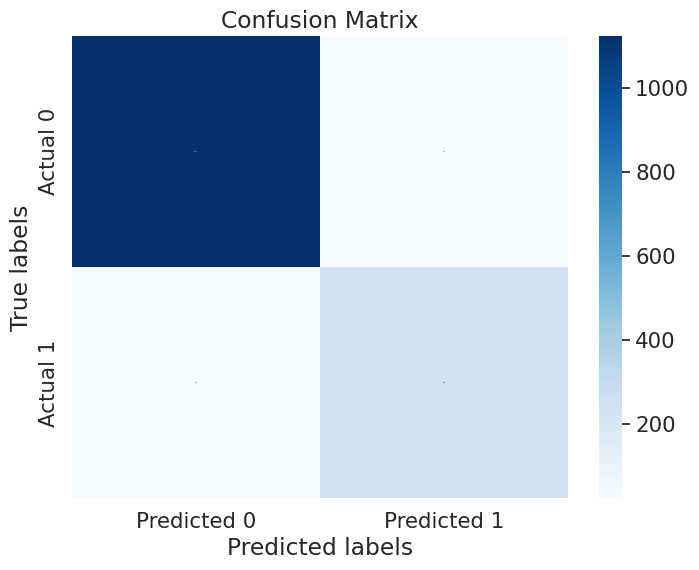

In [ ]:
xgb_classifier = XGBClassifier(random_state=seed, use_label_encoder=False, eval_metric='logloss')
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test)

calAccuracy(y_test, y_pred)

# Plot confusion matrix
plotConfusionMatrix(y_test, y_pred)

AdaBoost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

Accuracy: 0.8884943181818182
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      1145
           1       0.76      0.59      0.66       263

    accuracy                           0.89      1408
   macro avg       0.84      0.77      0.80      1408
weighted avg       0.88      0.89      0.88      1408



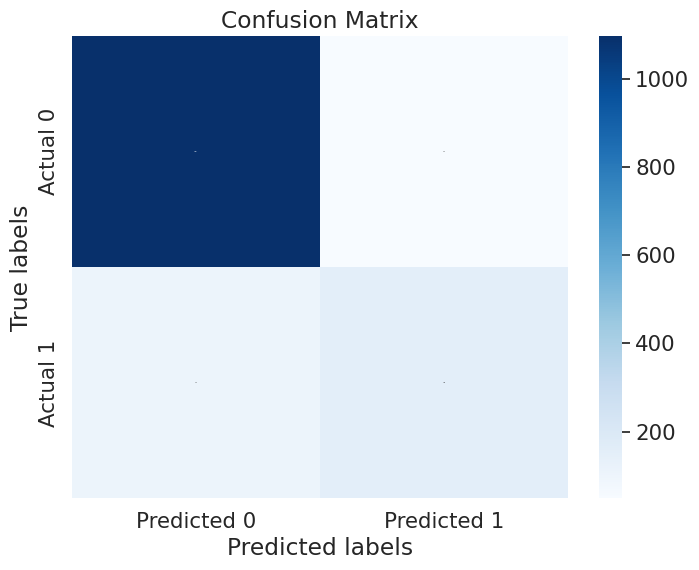

In [ ]:
adb_classifier = AdaBoostClassifier(random_state=seed)
adb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = adb_classifier.predict(X_test)

# Calculate accuracy
calAccuracy(y_test, y_pred)

# Plot confusion matrix
plotConfusionMatrix(y_test, y_pred)

K-Nearest Neighbours

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

Accuracy: 0.9204545454545454
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1145
           1       0.90      0.65      0.75       263

    accuracy                           0.92      1408
   macro avg       0.91      0.82      0.85      1408
weighted avg       0.92      0.92      0.92      1408



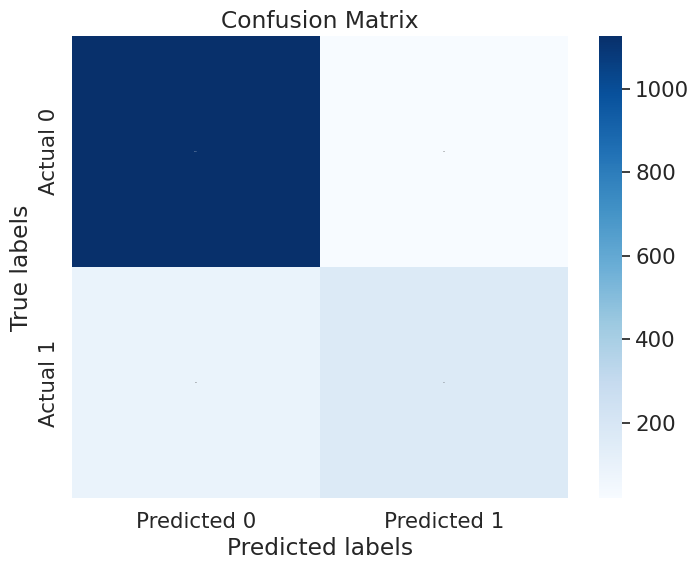

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=2)
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

# Calculate accuracy
calAccuracy(y_test, y_pred)

# Plot confusion matrix
plotConfusionMatrix(y_test, y_pred)

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

Accuracy: 0.9431818181818182
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1145
           1       0.84      0.87      0.85       263

    accuracy                           0.94      1408
   macro avg       0.90      0.91      0.91      1408
weighted avg       0.94      0.94      0.94      1408



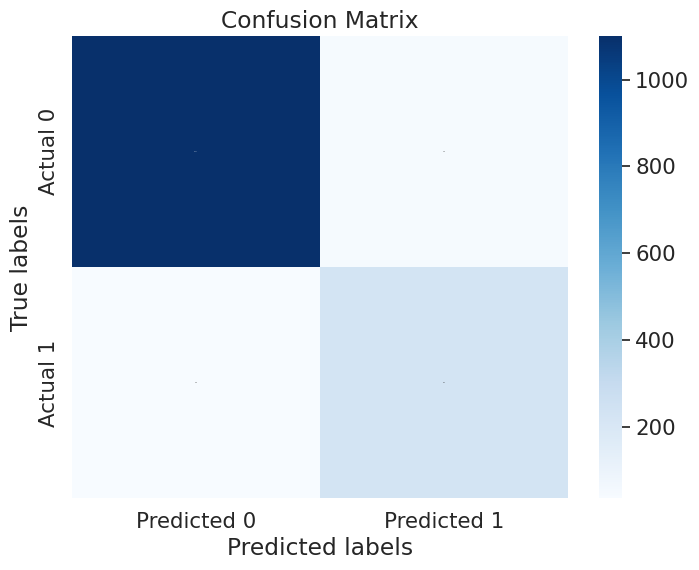

In [ ]:
dt_classifier = DecisionTreeClassifier(random_state=seed)
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Calculate accuracy
calAccuracy(y_test, y_pred)

# Plot confusion matrix
plotConfusionMatrix(y_test, y_pred)

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

Accuracy: 0.9609375
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1145
           1       0.94      0.84      0.89       263

    accuracy                           0.96      1408
   macro avg       0.95      0.92      0.93      1408
weighted avg       0.96      0.96      0.96      1408



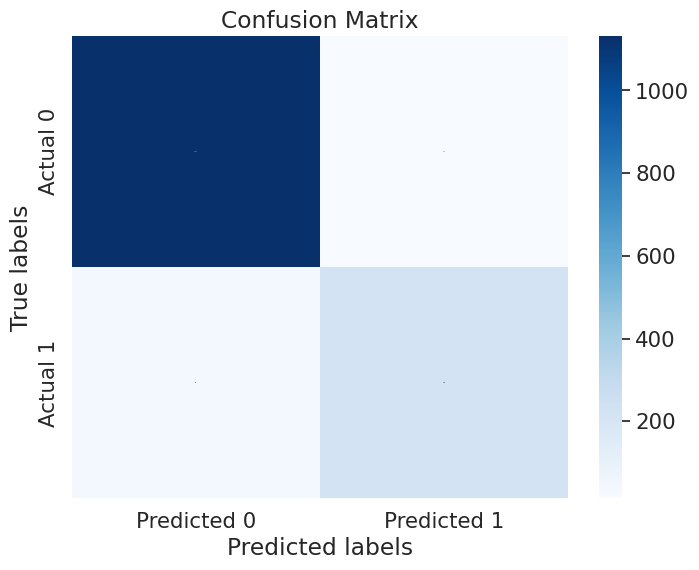

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=seed)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
calAccuracy(y_test, y_pred)

# Plot confusion matrix
plotConfusionMatrix(y_test, y_pred)

Gradient boosting classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

Accuracy: 0.9076704545454546
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1145
           1       0.81      0.66      0.73       263

    accuracy                           0.91      1408
   macro avg       0.87      0.81      0.84      1408
weighted avg       0.90      0.91      0.90      1408



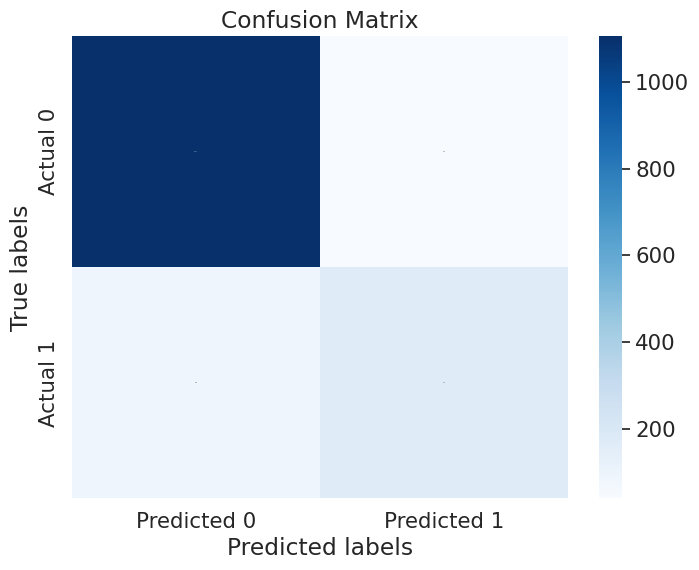

In [ ]:
gb_classifier = GradientBoostingClassifier( random_state=seed)
gb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_classifier.predict(X_test)

# Calculate accuracy
calAccuracy(y_test, y_pred)

# Plot confusion matrix
plotConfusionMatrix(y_test, y_pred)

Linear Discriminant Analysis

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

Accuracy: 0.8757102272727273
              precision    recall  f1-score   support

           0       0.89      0.96      0.93      1145
           1       0.74      0.51      0.60       263

    accuracy                           0.88      1408
   macro avg       0.82      0.73      0.77      1408
weighted avg       0.87      0.88      0.87      1408



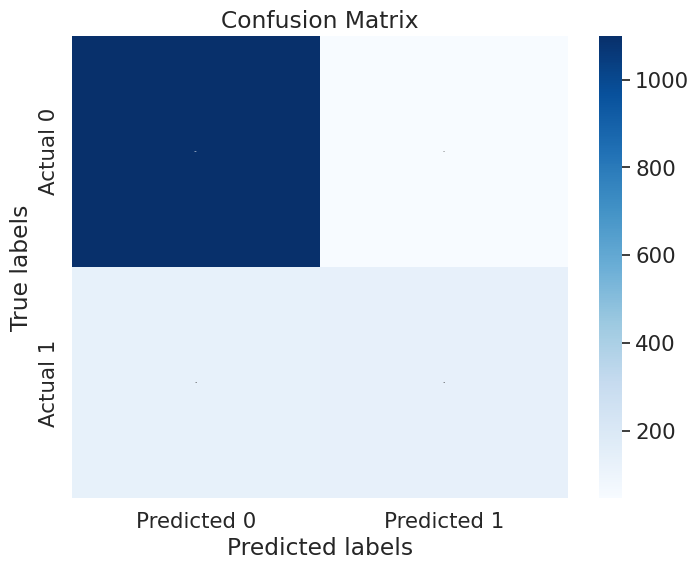

In [ ]:
lda_classifier = LinearDiscriminantAnalysis()
lda_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lda_classifier.predict(X_test)

# Calculate accuracy
calAccuracy(y_test, y_pred)

# Plot confusion matrix
plotConfusionMatrix(y_test, y_pred)

Support Vector Machines

In [ ]:
from sklearn.svm import SVC

Accuracy: 0.8742897727272727
              precision    recall  f1-score   support

           0       0.88      0.97      0.93      1145
           1       0.79      0.45      0.57       263

    accuracy                           0.87      1408
   macro avg       0.84      0.71      0.75      1408
weighted avg       0.87      0.87      0.86      1408



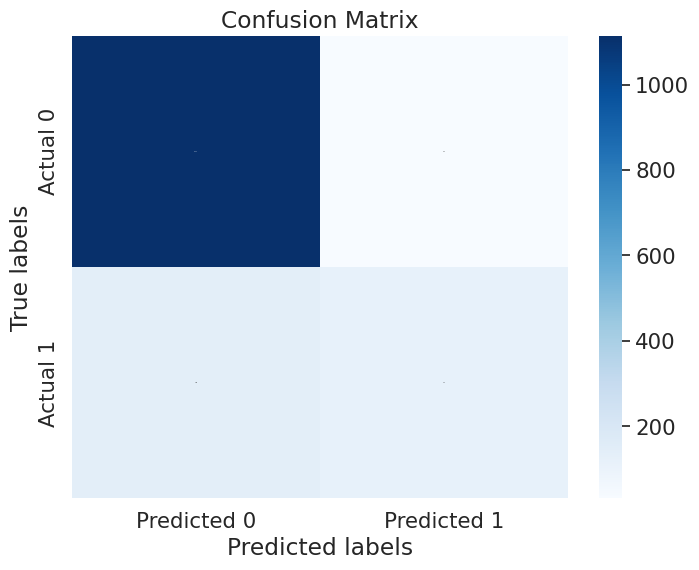

In [ ]:
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy
calAccuracy(y_test, y_pred)

# Plot confusion matrix
plotConfusionMatrix(y_test, y_pred)
